# 001086186 Srinjoy Chakravarty

# MAXIMUM LIKELIHOOD ESTIMATION:


Predict age of Ring from physical measurements



Attribute Details:
Name	Type	Description
sex	string	M, F, and I(infant)
length	float	Longest shell measurement (mm)
diameter	float	Perpendicular to length (mm)
height	float	With meat in chell (mm)
whole_weight	float	Whole abalone (grams)
shucked_weight	float	Weight of meat (grams)
viscera_weight	float	Gut weight: after bleeding (grams)
shell_weight	float	After being dried (grams)
rings	integer	Predictor: continuous from 1-29 except 28

In [1]:
import pandas as pd
import numpy as np

dbs=pd.read_csv('LOTR.csv',index_col=0,na_values='NA', delim_whitespace=False)


In [2]:
dbs.head()

,Length,Radius,Height,Weight,Shrink,Viscerial,Shell,Rings
Sex,,,,,,,,
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
dbs.empty

False

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dbs.dropna()

,Length,Radius,Height,Weight,Shrink,Viscerial,Shell,Rings
Sex,,,,,,,,
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [6]:
dbs.size

33416

In [7]:
from scipy.special import psi, polygamma
from scipy.stats import gamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

Calculate statistics

In [8]:

log_mean = dbs.mean().apply(np.log)
mean_log = dbs.apply(np.log).mean()

CALCULATION OF ALPHA_MLE AND BETA_MLE

In [9]:
from scipy.optimize import newton

alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

10.113528445930784

In [10]:
beta_mle = alpha_mle/dbs.mean()[-1]
beta_mle

1.0181044590329185

Gamma distribution that fits the datapoints correctly

Our Dataset doesn't fit according to the exponential distribution

Exponential distribution is the probability distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate

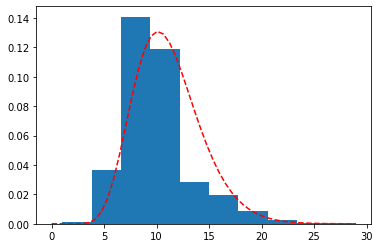

In [11]:
dec = dbs.Rings
dec.hist(density=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
#plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [22]:
from scipy.stats import gamma

gamma.fit(dbs.Rings)

(9.548416331363981, 0.26282636600537074, 1.0128229480241906)